# Data Cleaning

In [107]:
#libraries
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [82]:
#fetch the data and view the data
conn = sqlite3.connect("data/bmarket.db")
df = pd.read_sql_query("SELECT * FROM bank_marketing;", conn)
conn.close()
df.head()


,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           16399 non-null  object
 7   Personal Loan          37042 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


In [84]:
# See unique values for all the columns
for col in df.columns:
    print(f"{col}")
    print(df[col].unique())
    print()

Client ID
[32885  3170 32207 ... 38159   861 15796]

Age
['57 years' '55 years' '33 years' '36 years' '27 years' '58 years'
 '48 years' '150 years' '24 years' '34 years' '42 years' '43 years'
 '26 years' '37 years' '46 years' '59 years' '49 years' '30 years'
 '51 years' '45 years' '31 years' '41 years' '38 years' '47 years'
 '69 years' '50 years' '25 years' '39 years' '44 years' '52 years'
 '35 years' '77 years' '40 years' '56 years' '53 years' '60 years'
 '29 years' '28 years' '54 years' '32 years' '81 years' '63 years'
 '21 years' '22 years' '74 years' '80 years' '62 years' '68 years'
 '86 years' '23 years' '71 years' '67 years' '65 years' '20 years'
 '19 years' '66 years' '75 years' '18 years' '72 years' '70 years'
 '82 years' '85 years' '61 years' '88 years' '83 years' '78 years'
 '64 years' '17 years' '76 years' '73 years' '79 years' '89 years'
 '84 years' '91 years' '98 years' '92 years' '95 years']

Occupation
['technician' 'unknown' 'blue-collar' 'admin.' 'housemaid' 'retired'


In [85]:
# Checking for NAN values for the columns
df.isnull().sum()

Client ID                    0
Age                          0
Occupation                   0
Marital Status               0
Education Level              0
Credit Default               0
Housing Loan             24789
Personal Loan             4146
Contact Method               0
Campaign Calls               0
Previous Contact Days        0
Subscription Status          0
dtype: int64

In [86]:
# Remove years, strip spaces, and convert to integer in the age columns
df['Age'] = df['Age'].str.extract(r'(\d+)').astype(int)
df

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27,housemaid,married,high.school,no,None,no,Cell,2,999,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,6266,58,retired,married,professional.course,unknown,no,no,Telephone,2,999,no
41184,11285,37,management,married,university.degree,no,no,no,telephone,1,999,no
41185,38159,35,admin.,married,high.school,no,None,no,cellular,1,4,yes
41186,861,40,management,married,university.degree,no,None,no,telephone,2,999,no


In [87]:
#Check for unrealistic data in age for <18 and >100
underage = df[df['Age'] < 18]
overage = df[df['Age'] > 100]

print("Number of clients with Age < 18:", len(underage))
print("Number of clients with Age > 100:", len(overage))

Number of clients with Age < 18: 5
Number of clients with Age > 100: 4197


In [88]:
# drop the realistic age 
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]
df

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27,housemaid,married,high.school,no,None,no,Cell,2,999,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,6266,58,retired,married,professional.course,unknown,no,no,Telephone,2,999,no
41184,11285,37,management,married,university.degree,no,no,no,telephone,1,999,no
41185,38159,35,admin.,married,high.school,no,None,no,cellular,1,4,yes
41186,861,40,management,married,university.degree,no,None,no,telephone,2,999,no


In [89]:
#Check min and max age
print("Min age:", df['Age'].min())
print("Max age:", df['Age'].max())

Min age: 18
Max age: 98


In [90]:
#Remove all non alphanumeric
df['Occupation'] = df['Occupation'].str.replace(r'[^a-zA-Z0-9\-]', '', regex=True)
df

C:\Users\hhaow\AppData\Local\Temp\ipykernel_2480\4086115683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = df['Occupation'].str.replace(r'[^a-zA-Z0-9\-]', '', regex=True)


,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36,admin,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27,housemaid,married,high.school,no,None,no,Cell,2,999,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,6266,58,retired,married,professional.course,unknown,no,no,Telephone,2,999,no
41184,11285,37,management,married,university.degree,no,no,no,telephone,1,999,no
41185,38159,35,admin,married,high.school,no,None,no,cellular,1,4,yes
41186,861,40,management,married,university.degree,no,None,no,telephone,2,999,no


In [91]:
# Remove the '.'
df['Education Level'] = df['Education Level'].str.replace('.', ' ', regex=False)
df

C:\Users\hhaow\AppData\Local\Temp\ipykernel_2480\2652065599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = df['Education Level'].str.replace('.', ' ', regex=False)


,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57,technician,married,high school,no,no,yes,Cell,1,999,no
1,3170,55,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33,blue-collar,married,basic 9y,no,no,no,cellular,1,999,no
3,9404,36,admin,married,high school,no,no,no,Telephone,4,999,no
4,14021,27,housemaid,married,high school,no,None,no,Cell,2,999,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,6266,58,retired,married,professional course,unknown,no,no,Telephone,2,999,no
41184,11285,37,management,married,university degree,no,no,no,telephone,1,999,no
41185,38159,35,admin,married,high school,no,None,no,cellular,1,4,yes
41186,861,40,management,married,university degree,no,None,no,telephone,2,999,no


In [92]:
# Replace nulls with "unknown" to keep it as the same as the rest which was unknown
df['Housing Loan'] = df['Housing Loan'].fillna('unknown')
df['Personal Loan'] = df['Personal Loan'].fillna('unknown')
print(df[['Housing Loan', 'Personal Loan']].isnull().sum())
print(df[['Housing Loan', 'Personal Loan']].value_counts())

Housing Loan     0
Personal Loan    0
dtype: int64
Housing Loan  Personal Loan
unknown       no               16567
yes           no                5731
no            no                5126
unknown       unknown           3053
              yes               3036
yes           yes               1185
no            yes                820
yes           unknown            770
no            unknown            698
Name: count, dtype: int64


C:\Users\hhaow\AppData\Local\Temp\ipykernel_2480\1940294484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Housing Loan'] = df['Housing Loan'].fillna('unknown')
C:\Users\hhaow\AppData\Local\Temp\ipykernel_2480\1940294484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Personal Loan'] = df['Personal Loan'].fillna('unknown')


In [93]:
# To ensure consistency in data representation
for col in ['Housing Loan', 'Personal Loan','Contact Method']:
    df[col] = df[col].astype(str).str.lower()


C:\Users\hhaow\AppData\Local\Temp\ipykernel_2480\1108193843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.lower()
C:\Users\hhaow\AppData\Local\Temp\ipykernel_2480\1108193843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.lower()
C:\Users\hhaow\AppData\Local\Temp\ipykernel_2480\1108193843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [94]:
#check for negative calls
negative_calls = df[df['Campaign Calls'] < 0]
print("Negative Campaign Calls count:", len(negative_calls))

Negative Campaign Calls count: 3744


In [95]:
# Cleaning for negative calls 
df = df[df['Campaign Calls'] >= 0]
print("Minimum Campaign Calls:", df['Campaign Calls'].min())

Minimum Campaign Calls: 1


In [96]:
#check for negative calls
negative_calls = df[df['Previous Contact Days'] < 0]
print("Negative Previous Contact Days count:", len(negative_calls))



Negative Previous Contact Days count: 0


# Exploratory Data Analysis(EDA)


### Outliers
To detect errors and understand unusual patterns in the data, so that they do not skew the results of machine learning models.

<Figure size 1800x500 with 0 Axes>

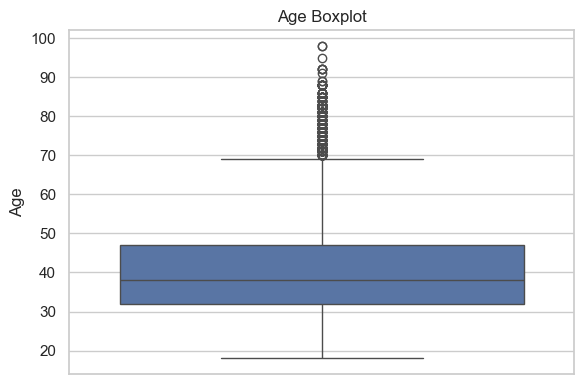

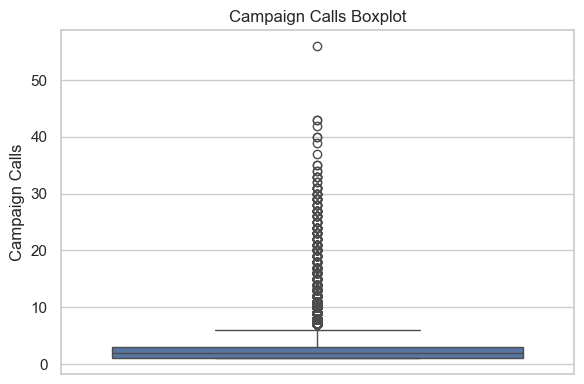

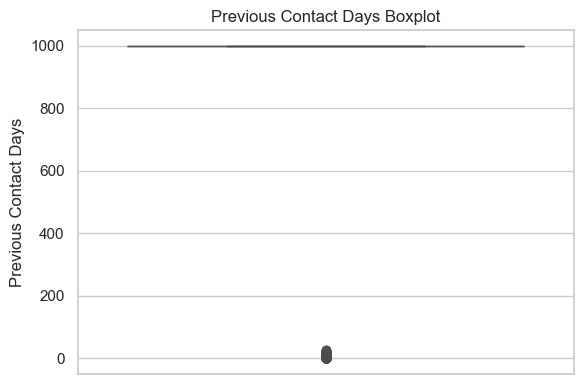

In [97]:
# List of numerical columns
numerical_cols = ['Age', 'Campaign Calls', 'Previous Contact Days']

# Box plots to visually inspect outliers
plt.figure(figsize=(18, 5))

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'{col} Boxplot')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Evaluation 
For Age, most clients are between 30 and 60 years old. Some older clients above 70 are marked as outliers, but they are valid and should not be removed.

For Campaign Calls, most clients got 1 to 3 calls. Some received more than 10, which are outliers.

For Previous Contact Days, many values are 999, meaning the client was never contacted before. It's not a real outlier. 

### Check for Class balance

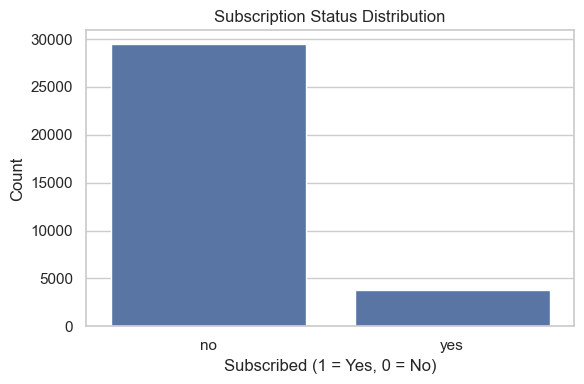

Subscription Status
no     88.526563
yes    11.473437
Name: proportion, dtype: float64


In [98]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Subscription Status', data=df)
plt.title('Subscription Status Distribution')
plt.xlabel('Subscribed (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
percentages = df['Subscription Status'].value_counts(normalize=True) * 100
print(percentages)

The Subscription Status Distribution chart shows that the majority of clients did not subscribe, while only a small number did. This reveal a class imbalance, where one category ("no") is much larger than the other ("yes").

This imbalance can cause problems during machine learning, because the model might learn to always predict "no" and still get high accuracy. To prevent this, the imbalance may need to be handled later using techniques like resampling, class weighting, or using evaluation metrics that consider both classes fairly.

### Analysis on Categorical Columns
To understand the distribution of each categorical feature

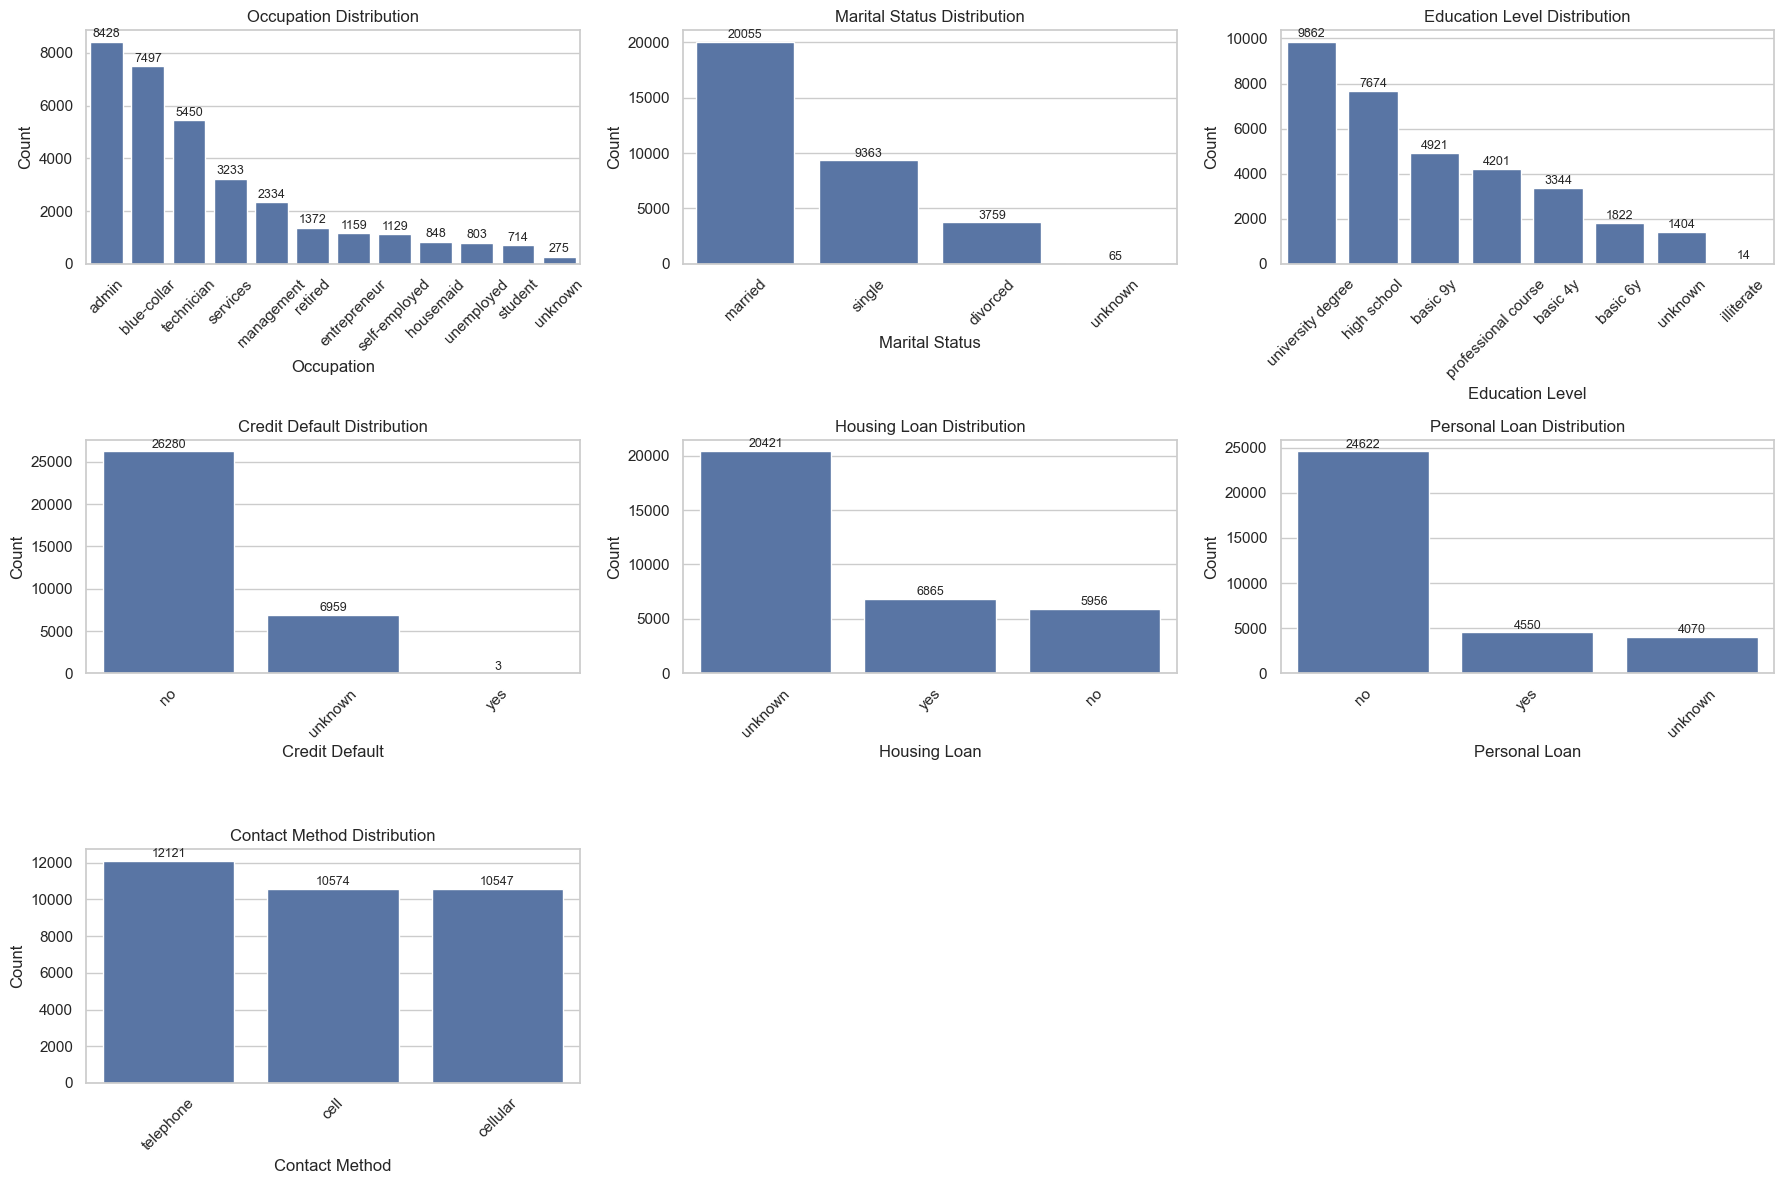

In [99]:
# Set visual style
sns.set(style="whitegrid")

# Define categorical columns
categorical_cols = [
    'Occupation', 'Marital Status', 'Education Level',
    'Credit Default', 'Housing Loan', 'Personal Loan', 'Contact Method'
]

# Set up the figure layout
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Add count labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 50, f'{int(height)}', 
                ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

To understand the distribution of each category:
Occupation: Most clients work in admin roles.

Marital Status: The majority of clients are married.

Education Level: Most clients have either a university degree or completed high school.

Credit Default: Most clients do not have a credit default.
 
Housing Loan: Most clients do not have a housing loan.

Personal Loan: Similar to housing loans, most clients do not have a personal loan.

Contact Method: All three methods: telephone, cellular, and cell. They are all balanced in distribution.



### Finding relationship between categorical columns and subscription status

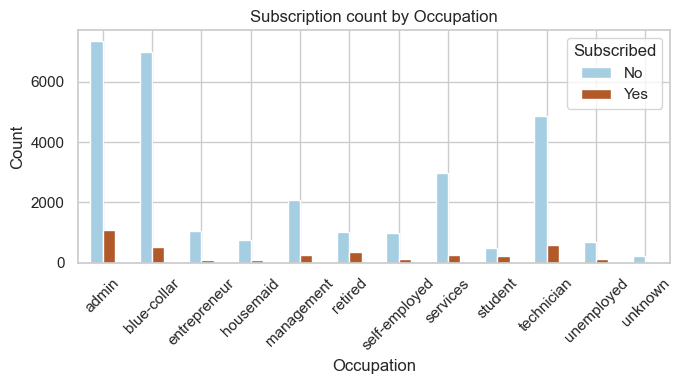

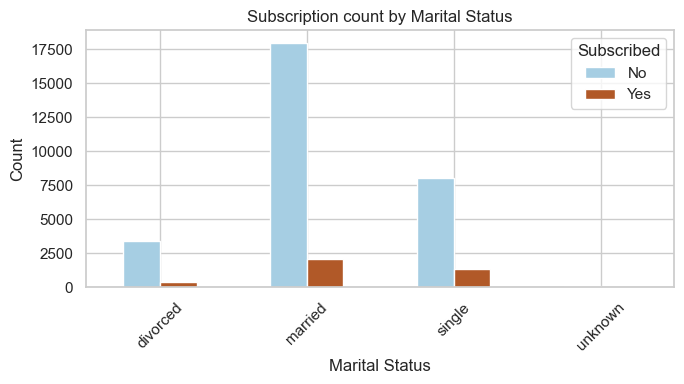

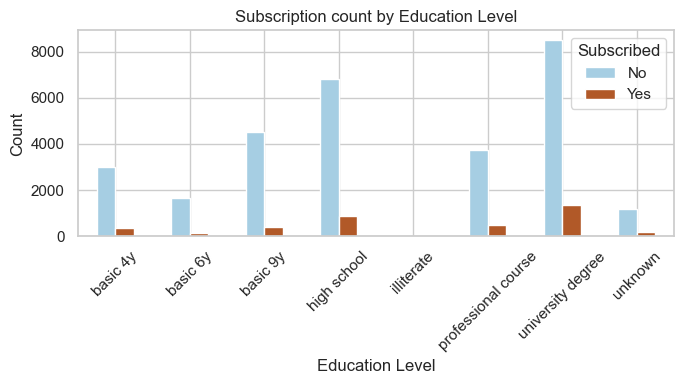

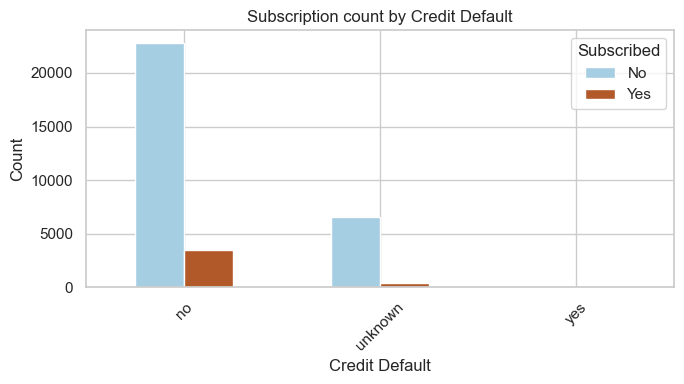

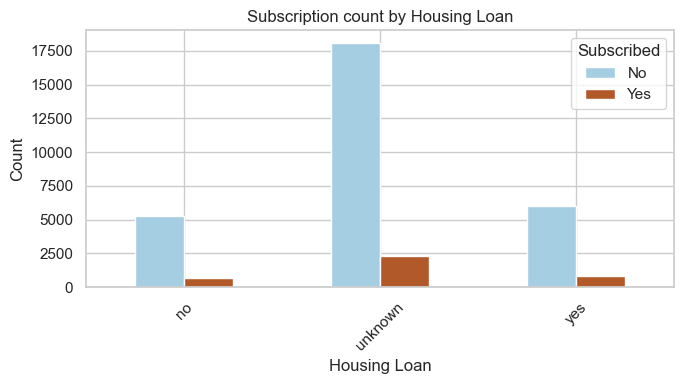

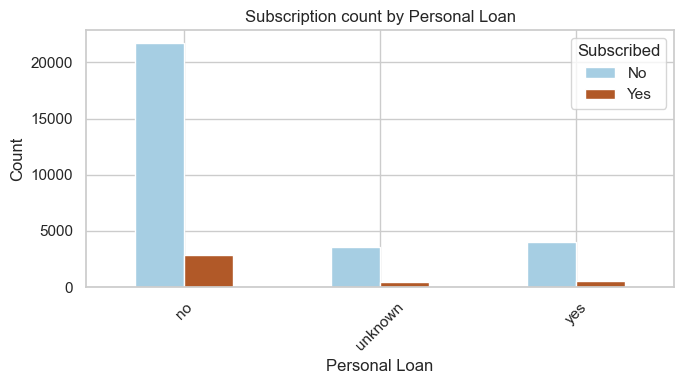

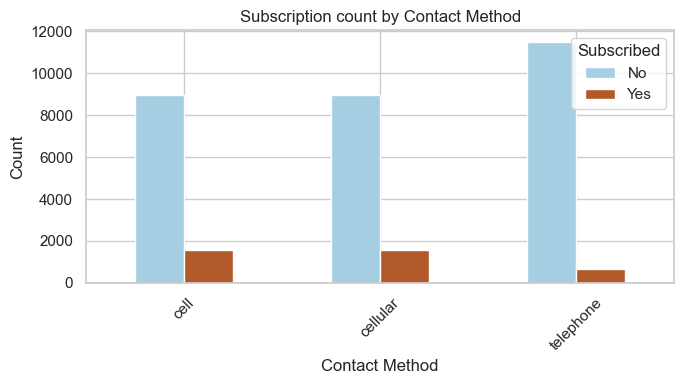

In [100]:
for col in categorical_cols:
    # Create crosstab for percentage (not normalized for grouped bar chart)
    ct = pd.crosstab(df[col], df['Subscription Status'])

    # Plot grouped bar chart
    ct.plot(kind='bar', stacked=False, figsize=(7, 4), colormap='Paired')

    plt.title(f'Subscription count by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Subscribed', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Evaluation
Occupation: Most clients are in admin and blue-collar jobs. Students, retired, and technicians have slightly higher subscription rates, suggesting occupation may influence decisions.

Marital Status: Most are married. Single clients show a slightly higher subscription rate, indicating marital status may have a small effect.

Education Level: University and high school levels are most common. Clients with a university degree are more likely to subscribe, showing education level is important.

Credit Default: Clients without credit default are much more likely to subscribe. Those with defaults rarely do, making this a strong predictor.

Housing Loan: Most clients do not have housing loans. Subscription rates are similar across groups, so this may not be a strong factor.

Personal Loan: Few clients have personal loans, and even fewer subscribed. This suggests a personal loan may reduce the likelihood of subscribing.

Contact Method: Cell and cellular contacts show higher subscription rates than telephone, meaning mobile contact methods may be more effective.

### Correlation heatmap 

# Feature Engineering

In [102]:
# Drop the Client ID column (not useful for prediction)
df.drop(columns=['Client ID'], inplace=True)
df

C:\Users\hhaow\AppData\Local\Temp\ipykernel_2480\859981226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Client ID'], inplace=True)


,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,57,technician,married,high school,no,no,yes,cell,1,999,no
1,55,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,33,blue-collar,married,basic 9y,no,no,no,cellular,1,999,no
3,36,admin,married,high school,no,no,no,telephone,4,999,no
4,27,housemaid,married,high school,no,unknown,no,cell,2,999,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,58,retired,married,professional course,unknown,no,no,telephone,2,999,no
41184,37,management,married,university degree,no,no,no,telephone,1,999,no
41185,35,admin,married,high school,no,unknown,no,cellular,1,4,yes
41186,40,management,married,university degree,no,unknown,no,telephone,2,999,no


In [103]:
#Convert yes/no to 1/0:
df['Subscription Status'] = df['Subscription Status'].map({'no': 0, 'yes': 1})

C:\Users\hhaow\AppData\Local\Temp\ipykernel_2480\2676022011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subscription Status'] = df['Subscription Status'].map({'no': 0, 'yes': 1})


In [104]:
print(df['Subscription Status'].unique())


[0 1]


In [105]:
print(df['Subscription Status'].value_counts())


Subscription Status
0    29428
1     3814
Name: count, dtype: int64


In [106]:
# df.to_csv('C:\Visual_Studio\caie-nyp-batch3-tanhaowen-769A\data/cleaned.csv', index = False)